In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile 
import warnings




In [106]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [107]:
# with ZipFile(r"ZİP_PATH", 'r') as zObject:  
# 	zObject.extractall(path=r"EXTRACT_PATH") 


# Data Preview

In [108]:
data=pd.read_csv(r"C:\Users\esman\Documents\Projects\MIUULMachineLearning\MiuulProject\HittersProject\Machine-Learning-Begginer\dataset\hitters.csv")
data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.000,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.000,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.000,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000,A


AtBat: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı

Hits :1986-1987 sezonundaki isabet sayısı

HmRun: 1986-1987 sezonundaki en değerli vuruş sayısı

Runs :1986-1987 sezonunda takımına kazandırdığı sayı

RBI: Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı

Walks: Karşı oyuncuya yaptırılan hata sayısı

Years: Oyuncunun major liginde oynama süresi (sene)

CAtBat: Oyuncunun kariyeri boyunca topa vurma sayısı

CHits :Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı

CHmRun: Oyucunun kariyeri boyunca yaptığı en değerli sayısı

CRuns :Oyuncunun kariyeri boyunca takımına kazandırdığı sayı

CRBI :Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı

CWalks: Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı

League: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör:

Division: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör:

PutOuts: Oyun icinde takım arkadaşınla yardımlaşma:

Assits :1986-1987 sezonunda oyuncunun yaptığı asist sayısı:

Errors :1986-1987 sezonundaki oyuncunun hata sayısı:

Salary :Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden):

NewLeague 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör:

In [123]:
def data_preview(dataframe):
    print("Shape : " , dataframe.shape)
    print("\n**************************************************************************\n")

    print("info : ", dataframe.info())
    print("\n**************************************************************************\n")
    
    print("null:" , dataframe.isnull().sum())
    print("\n**************************************************************************\n")

    print("head : \n" , dataframe.head(3))
    print("\n**************************************************************************\n")
    
    print("tail : \n" , dataframe.tail(3))
    print("\n**************************************************************************\n")
    print(dataframe.select_dtypes(exclude="object").describe().T)
    sns.histplot(data=dataframe, x="Salary", kde=True)

Shape :  (322, 20)

**************************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  

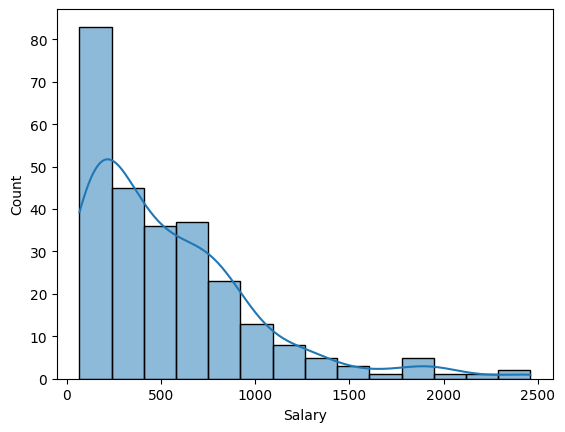

In [124]:
data_preview(data)

In [111]:
list(data.select_dtypes(include=["object"]).columns)

['League', 'Division', 'NewLeague']

In [112]:
def grab_cols(dataframe):
    cat_cols=list(dataframe.select_dtypes(include=["object"]).columns)
    num_but_cat_cols=[col 
                      for col in dataframe.select_dtypes(exclude=["object"]).columns 
                      if len(dataframe[col].unique())<=10 ]
    cat_cols+=num_but_cat_cols
    num_cols=[col for col in dataframe.columns if col not in cat_cols]
    return num_cols,cat_cols

In [113]:
num_cols, cat_cols=grab_cols(data)

In [132]:
print("num cols:\n",num_cols)
print("cat cols:\n",cat_cols)

num cols:
 ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']
cat cols:
 ['League', 'Division', 'NewLeague']


## Analysis of numerical variables

In [117]:
def visual_num_cols(dataframe,col):
    plt.figure(figsize=(16,8))
    sns.barplot(data=dataframe,
                y=col,
                x=pd.cut(dataframe["Salary"],bins=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500],labels=["0-250","250-500","500-750","750-1000","1000-1250","1250-1500","1500-1750","1750-2000","2000-2250","2250-2500"]),
                hue=pd.cut(dataframe["Years"],bins=[0,5,10,15,20,25],labels=["0-5","5-10","10-15","15-20","20-25"]),
                palette="viridis")
    
    plt.show()
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    quan_df=pd.DataFrame(dataframe[col].quantile(quantiles))
    print(quan_df.T)

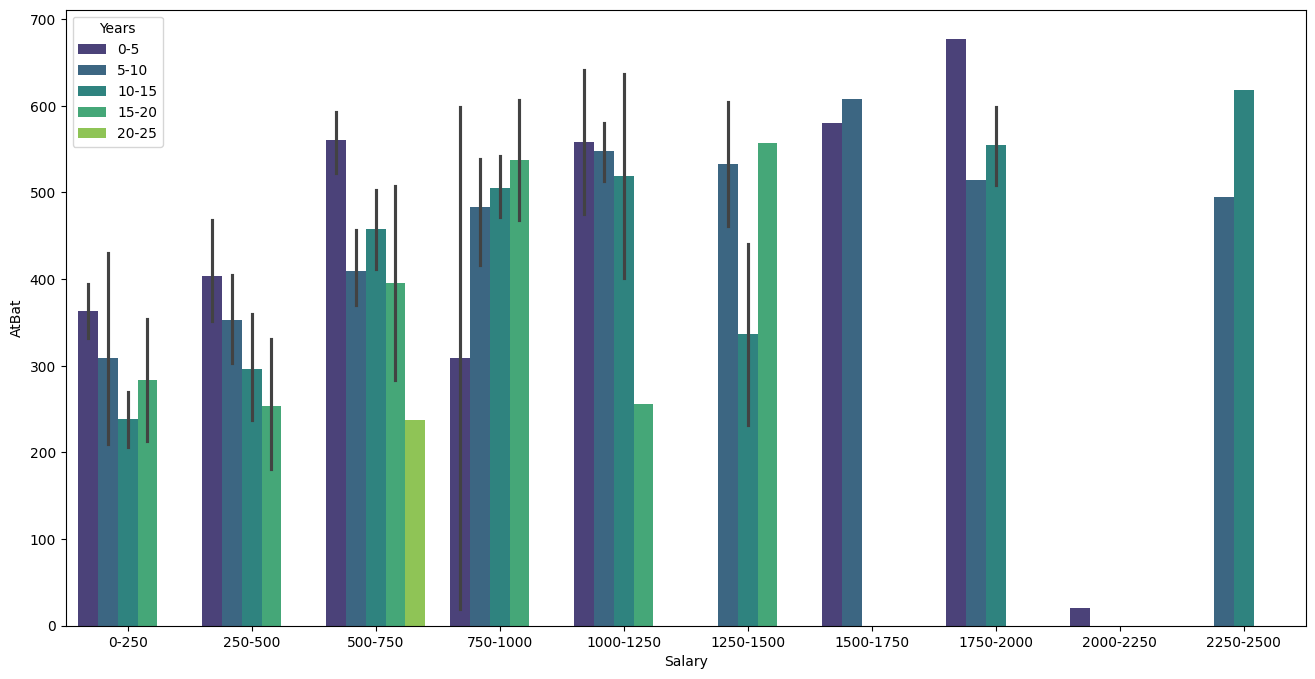

        0.050   0.100   0.200   0.300   0.400   0.500   0.600   0.700   0.800   0.900   0.950   0.990
AtBat 161.000 194.100 221.800 281.300 321.800 379.500 430.200 490.000 535.600 584.900 609.900 658.590


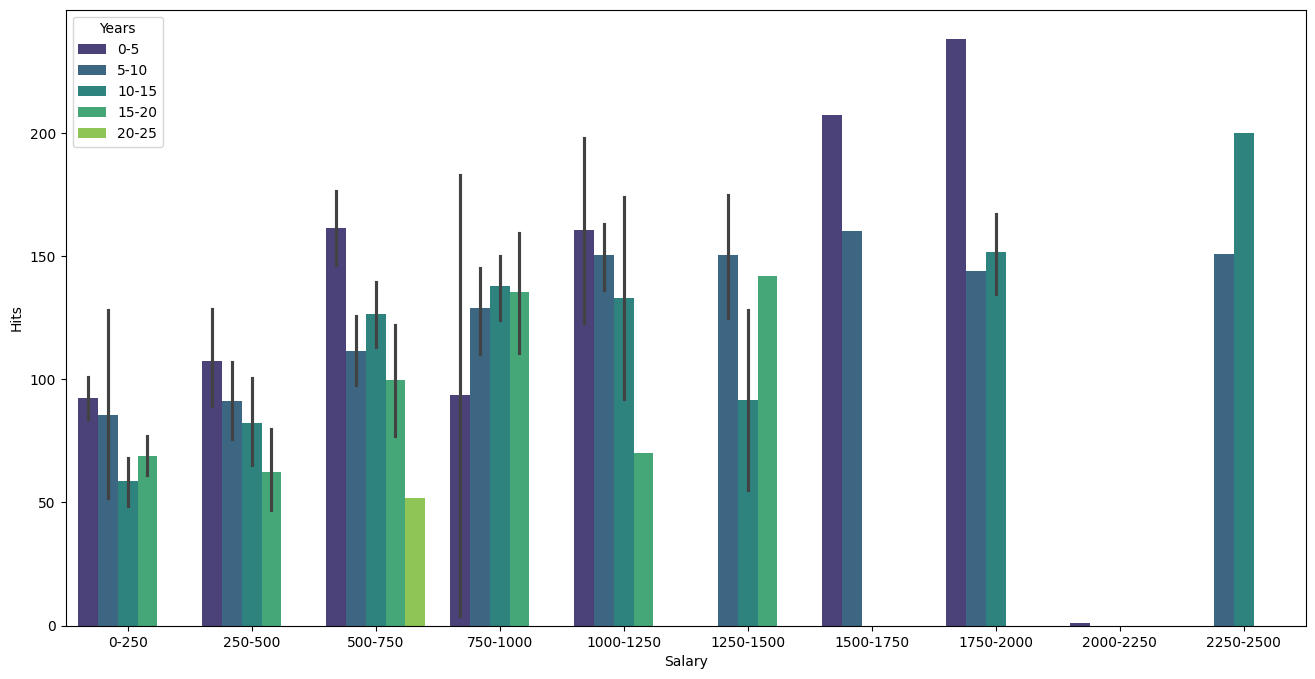

      0.050  0.100  0.200  0.300  0.400  0.500   0.600   0.700   0.800   0.900   0.950   0.990
Hits 39.000 45.100 57.000 70.000 82.000 96.000 113.000 128.700 144.000 163.000 174.000 210.790


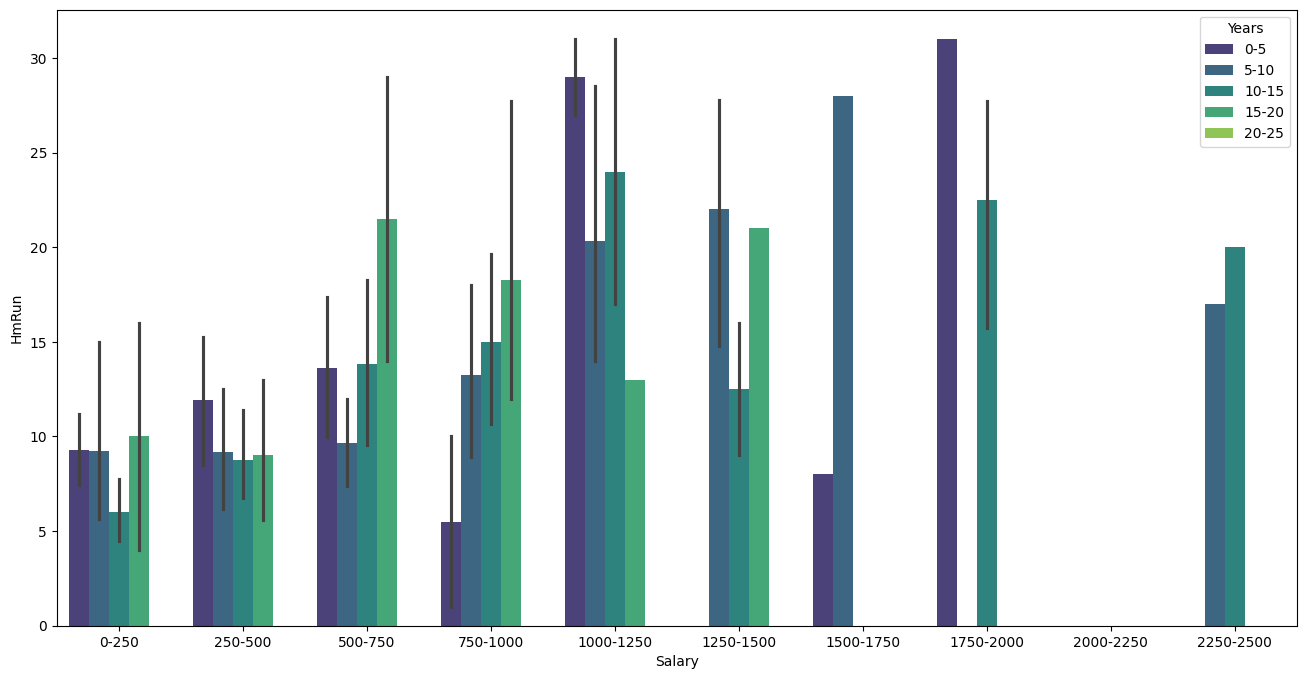

       0.050  0.100  0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900  0.950  0.990
HmRun  0.000  1.000  3.000  5.000  6.000  8.000 10.600 14.000 18.000 24.000 28.950 33.000


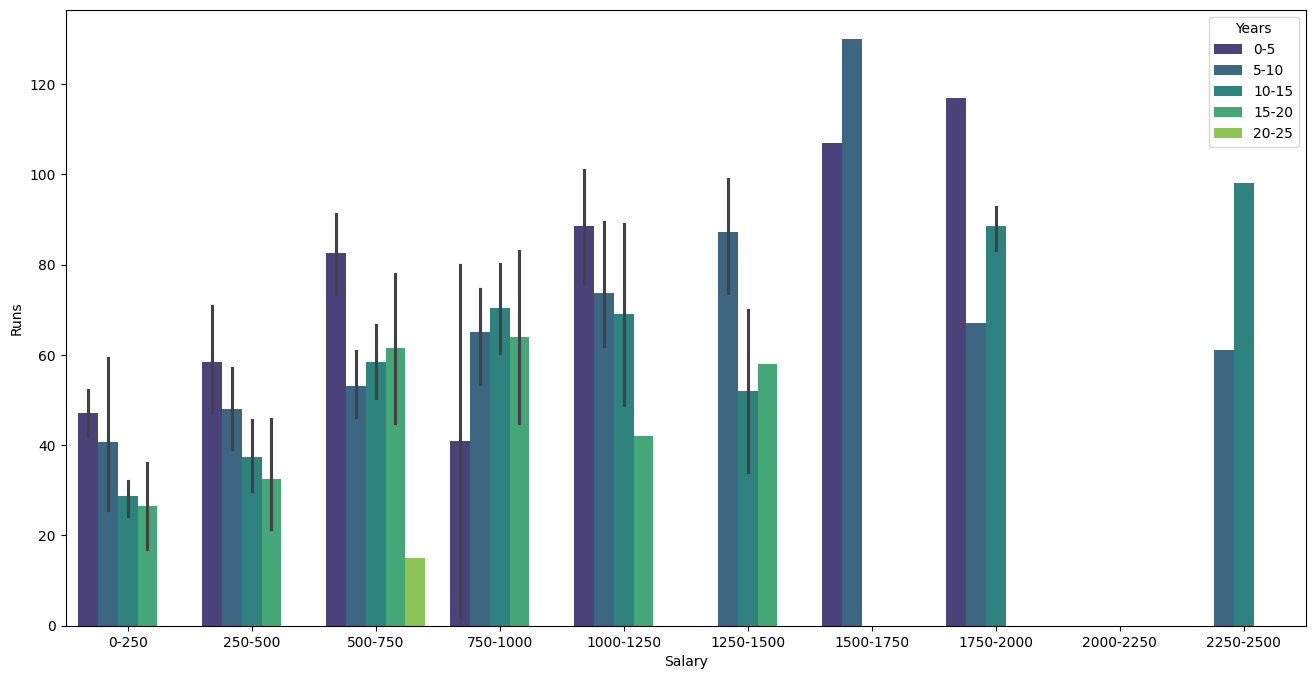

      0.050  0.100  0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900  0.950   0.990
Runs 17.000 20.100 27.000 33.000 41.000 48.000 55.600 66.000 75.800 89.000 94.000 107.790


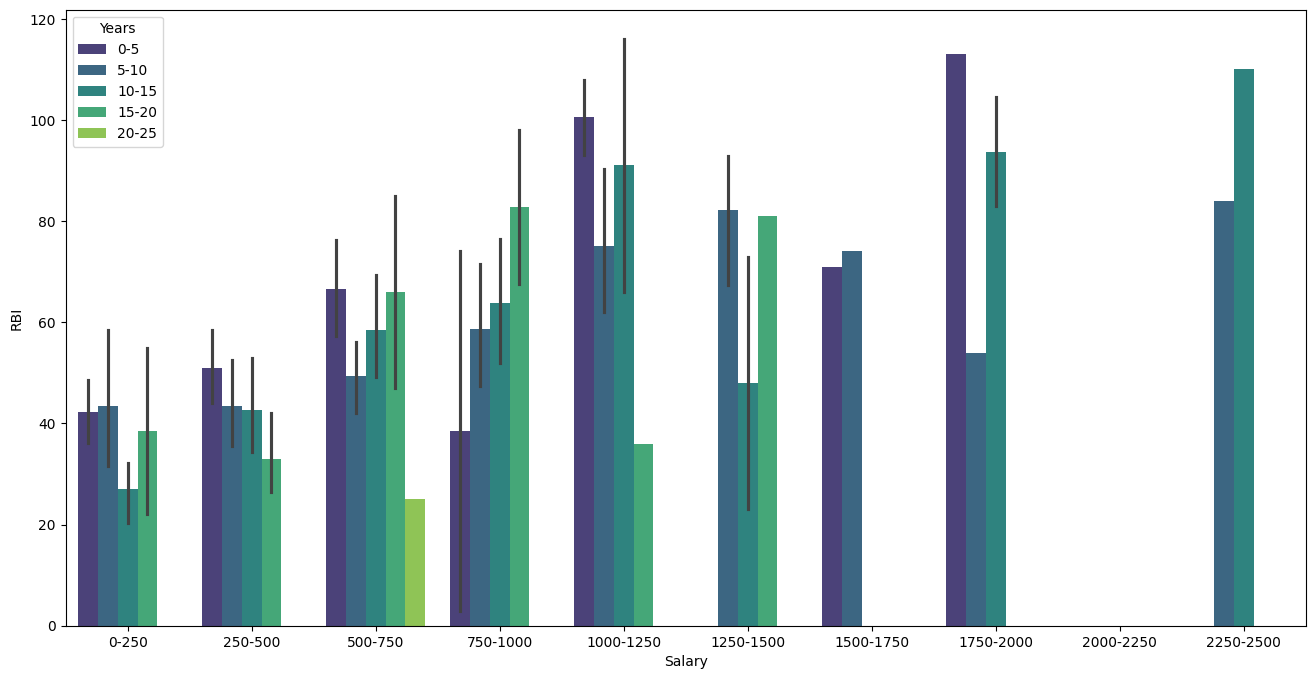

     0.050  0.100  0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900  0.950   0.990
RBI 14.000 19.000 26.000 30.000 36.400 44.000 49.000 58.000 73.000 86.000 96.000 112.370


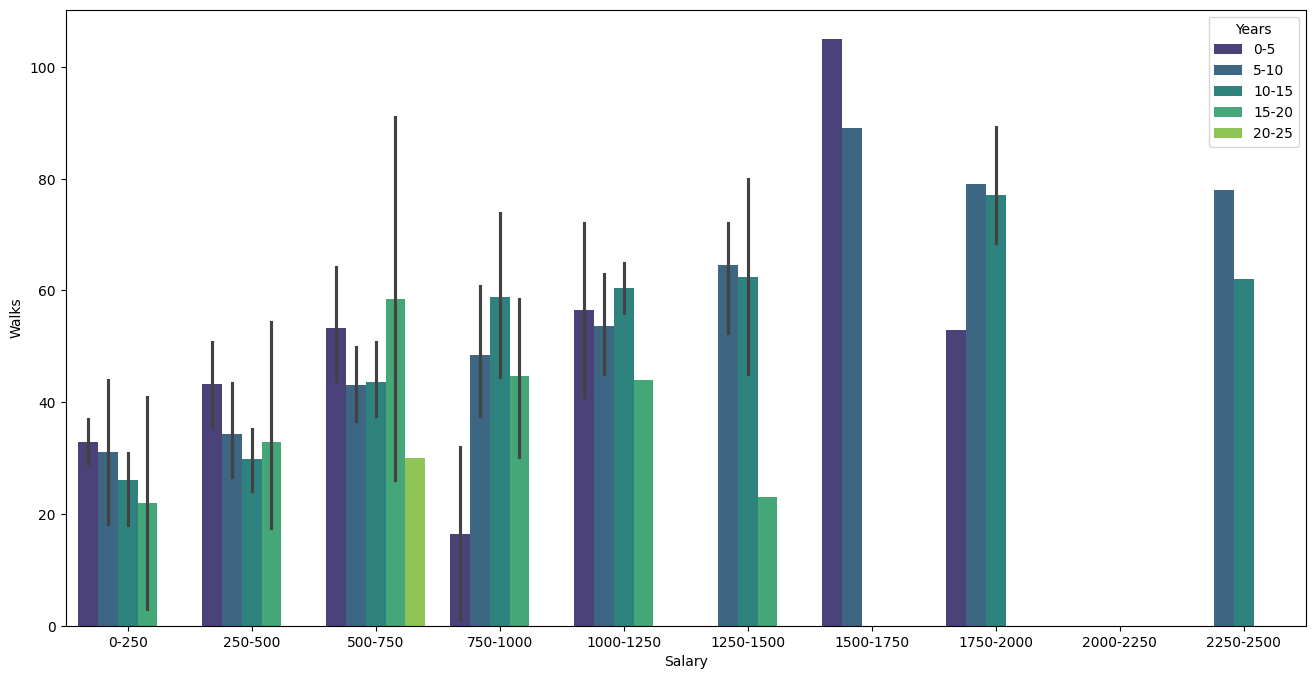

       0.050  0.100  0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900  0.950  0.990
Walks 11.050 15.000 20.000 24.000 30.000 35.000 40.000 48.700 59.000 69.900 78.000 93.580


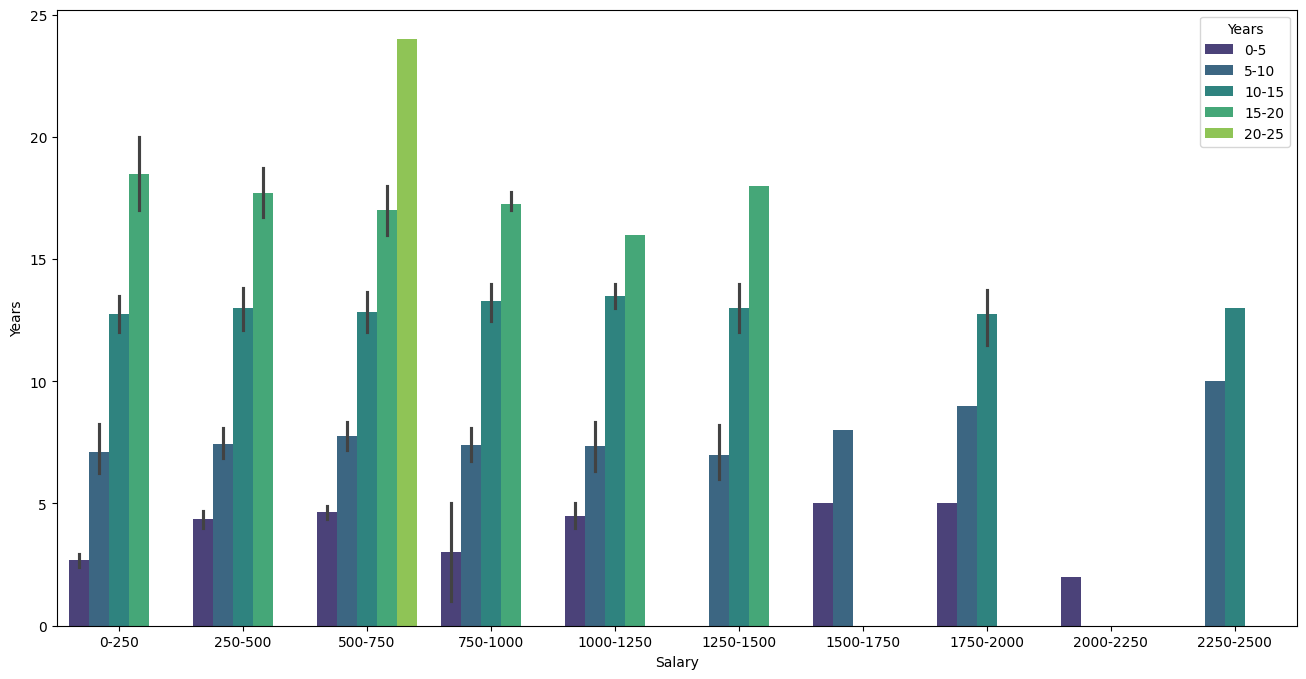

       0.050  0.100  0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900  0.950  0.990
Years  1.000  2.000  3.000  4.000  5.000  6.000  7.600 10.000 12.000 15.000 17.000 19.790


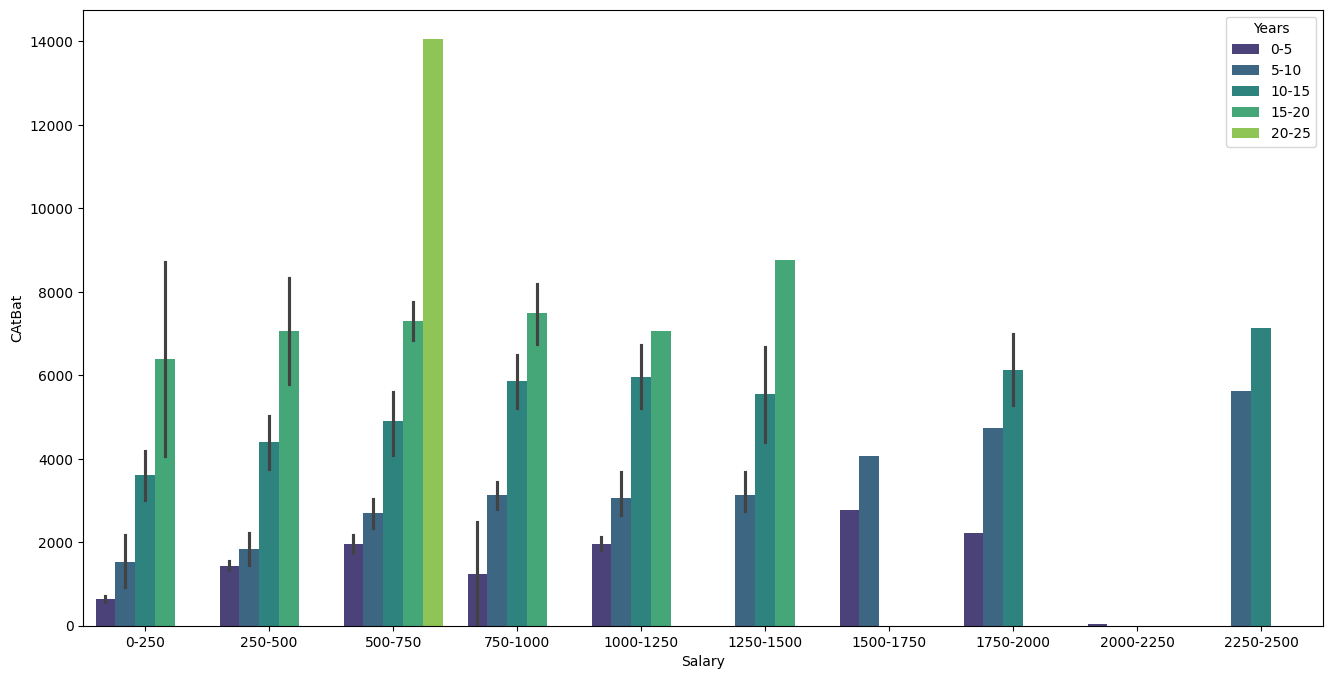

         0.050   0.100   0.200   0.300    0.400    0.500    0.600    0.700    0.800    0.900    0.950    0.990
CAtBat 216.500 342.200 667.600 963.400 1402.200 1928.000 2654.000 3365.000 4483.000 6123.400 7125.600 8749.970


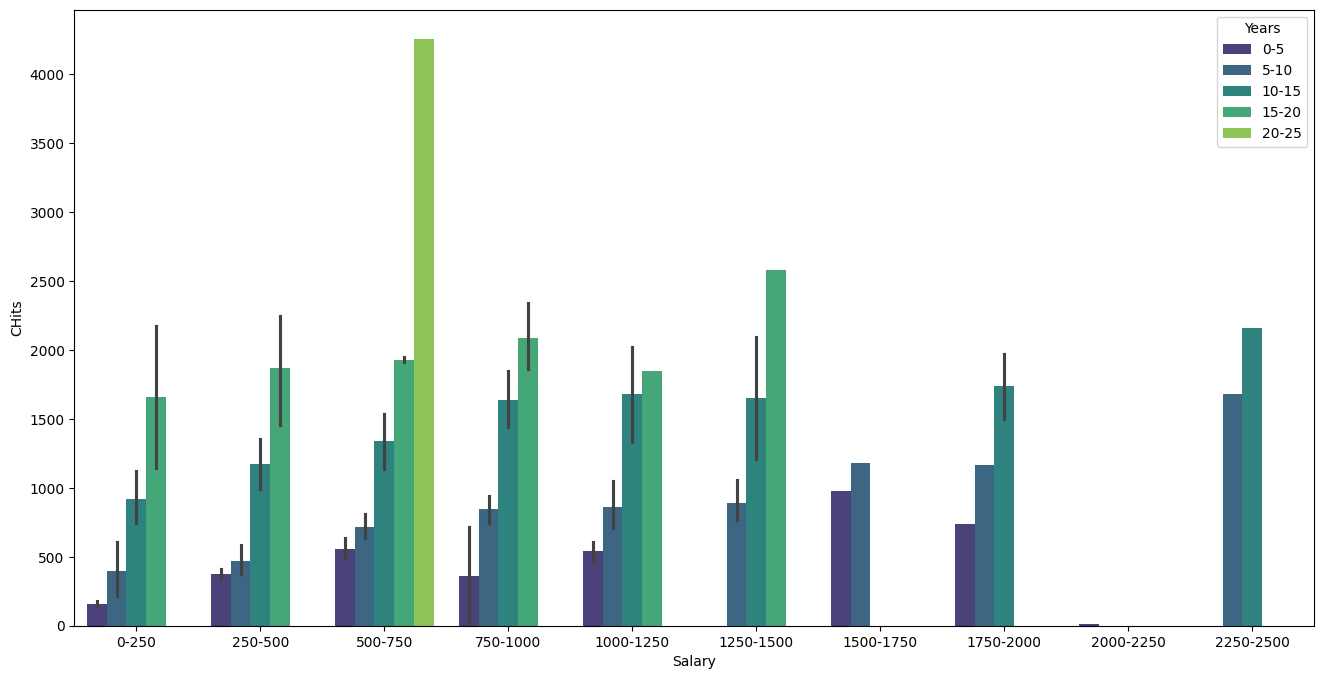

       0.050  0.100   0.200   0.300   0.400   0.500   0.600   0.700    0.800    0.900    0.950    0.990
CHits 54.000 86.000 164.600 238.000 355.800 508.000 708.200 911.100 1229.200 1659.600 2017.150 2500.340


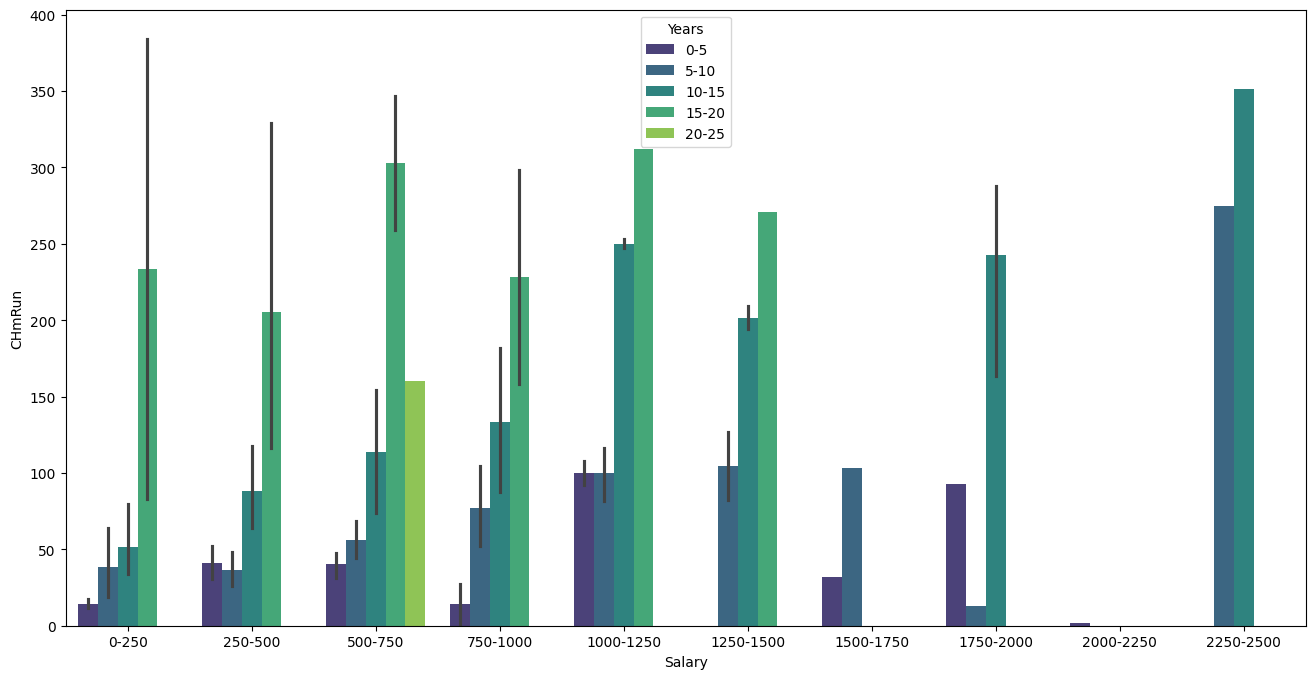

        0.050  0.100  0.200  0.300  0.400  0.500  0.600  0.700   0.800   0.900   0.950   0.990
CHmRun  2.000  4.000 10.200 16.300 27.400 37.500 51.200 72.400 103.800 194.900 265.650 373.120


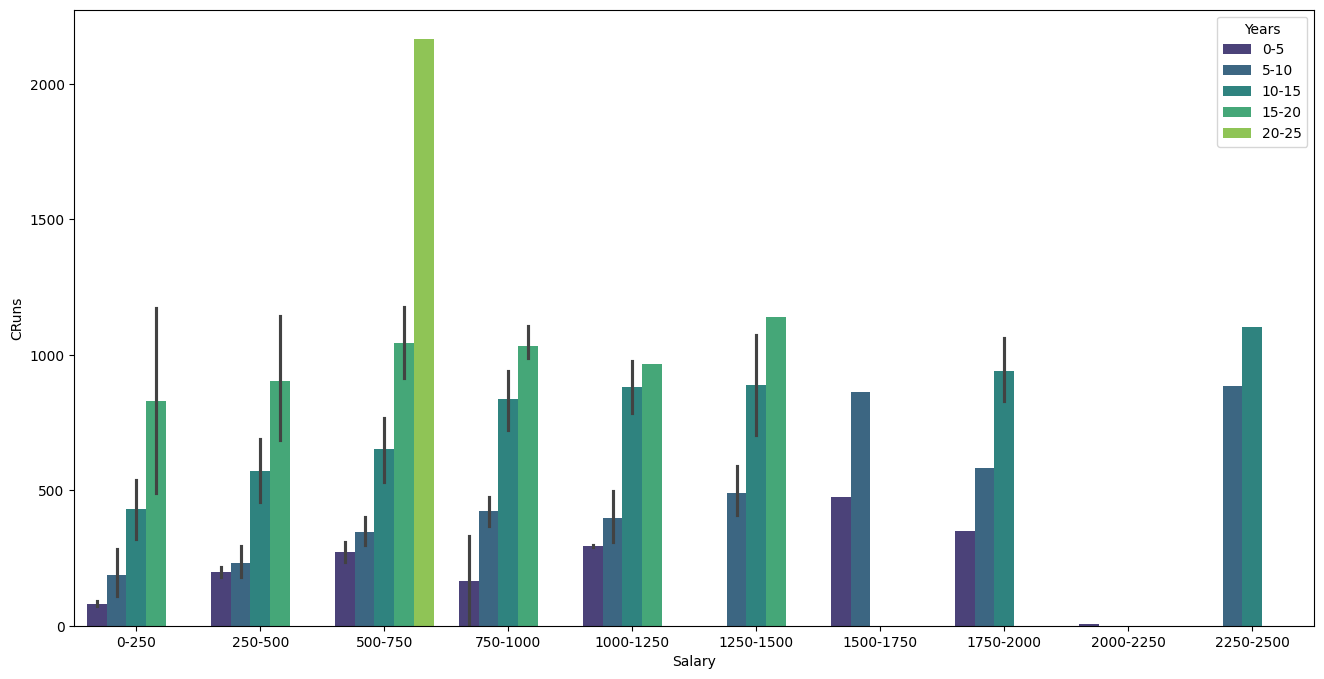

       0.050  0.100  0.200   0.300   0.400   0.500   0.600   0.700   0.800   0.900    0.950    0.990
CRuns 27.000 38.100 80.400 117.300 181.000 247.000 333.000 443.400 627.200 895.700 1032.300 1174.370


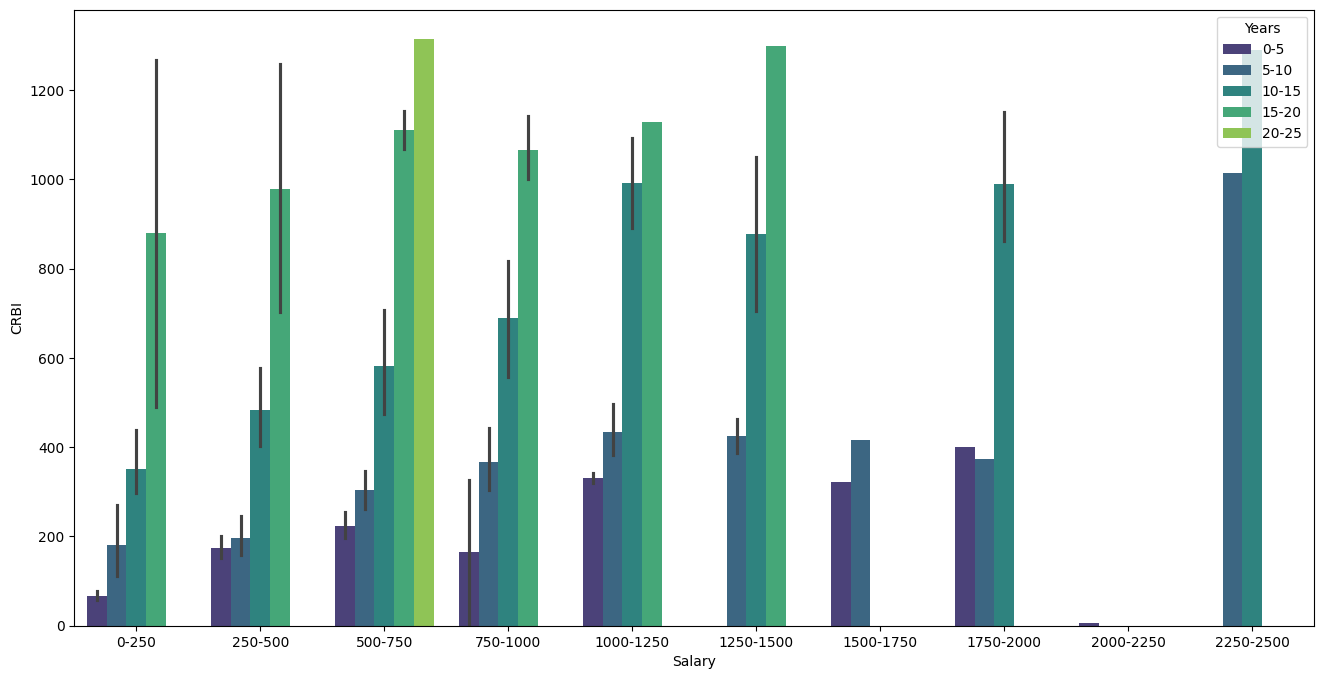

      0.050  0.100  0.200   0.300   0.400   0.500   0.600   0.700   0.800   0.900    0.950    0.990
CRBI 22.050 34.100 70.200 106.300 149.000 220.500 303.600 379.100 496.200 861.600 1071.750 1310.850


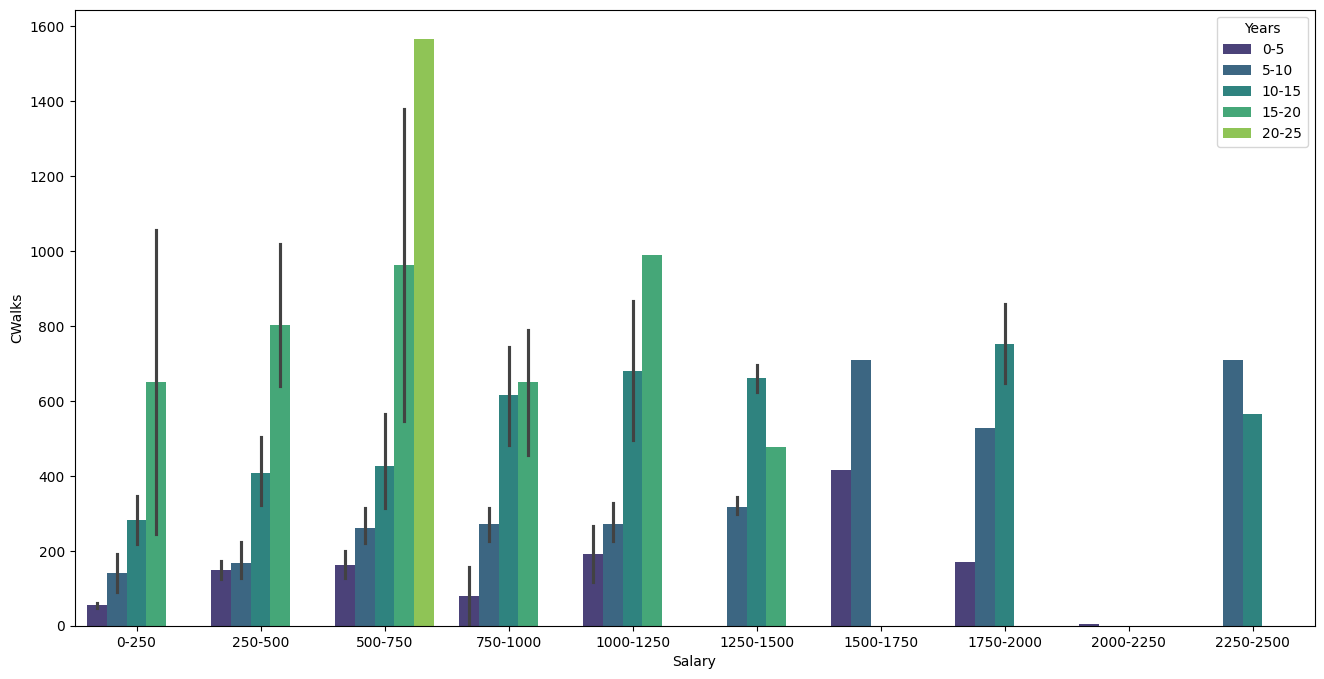

        0.050  0.100  0.200  0.300   0.400   0.500   0.600   0.700   0.800   0.900   0.950    0.990
CWalks 15.050 30.100 55.000 82.000 117.400 170.500 226.600 300.700 421.000 643.900 817.600 1139.140


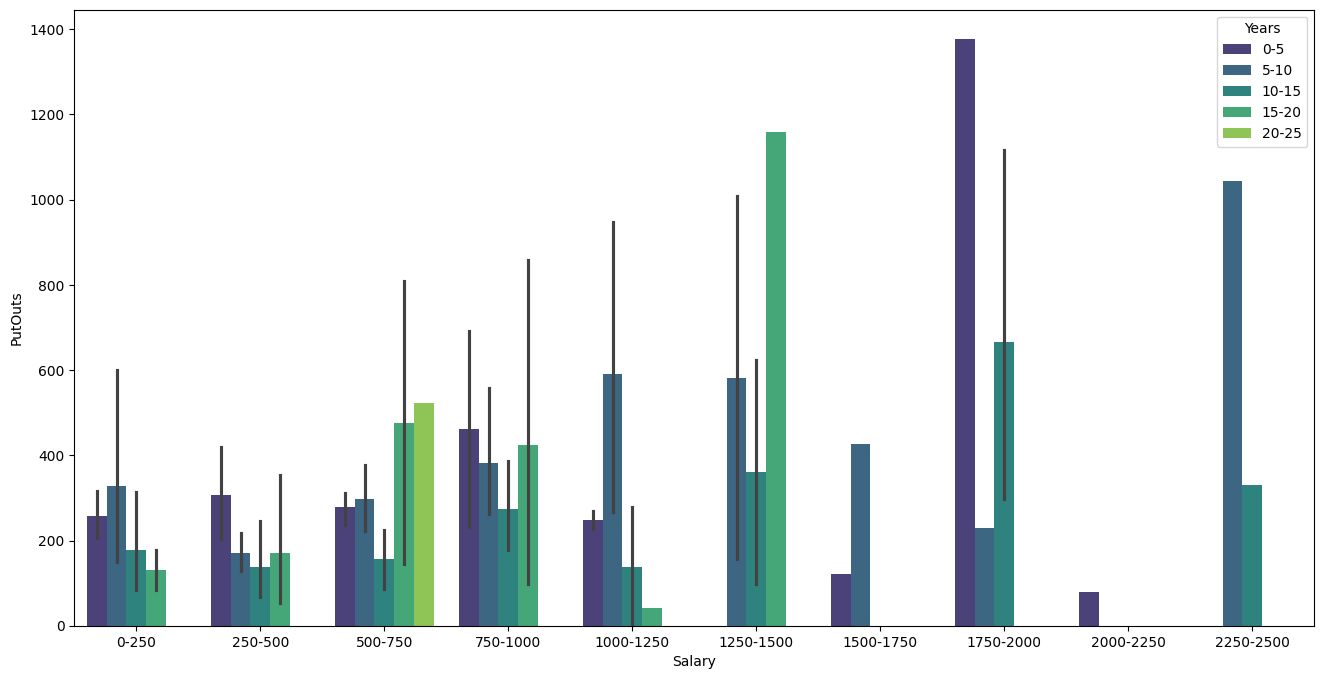

         0.050  0.100  0.200   0.300   0.400   0.500   0.600   0.700   0.800   0.900   0.950    0.990
PutOuts 33.200 62.200 99.600 132.000 167.000 212.000 257.400 303.000 365.800 685.600 910.650 1301.190


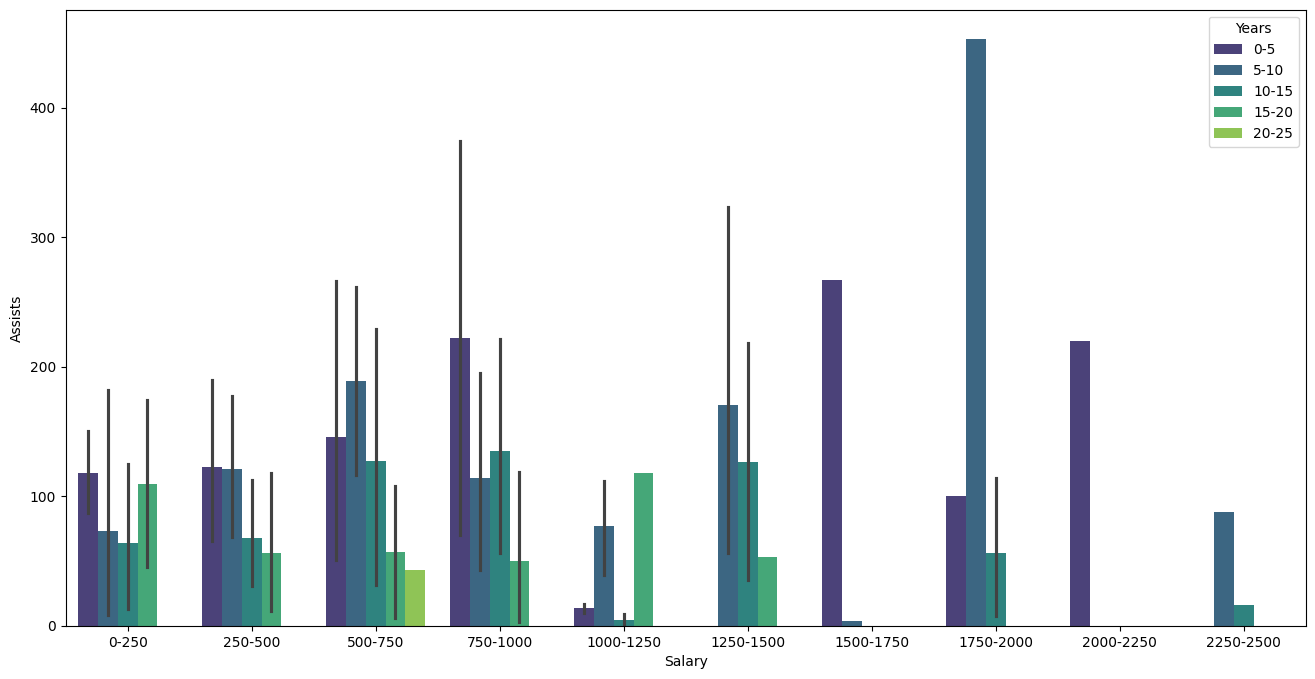

         0.050  0.100  0.200  0.300  0.400  0.500  0.600   0.700   0.800   0.900   0.950   0.990
Assists  0.000  2.000  5.200  9.000 15.400 39.500 76.800 134.800 210.800 353.300 431.450 478.160


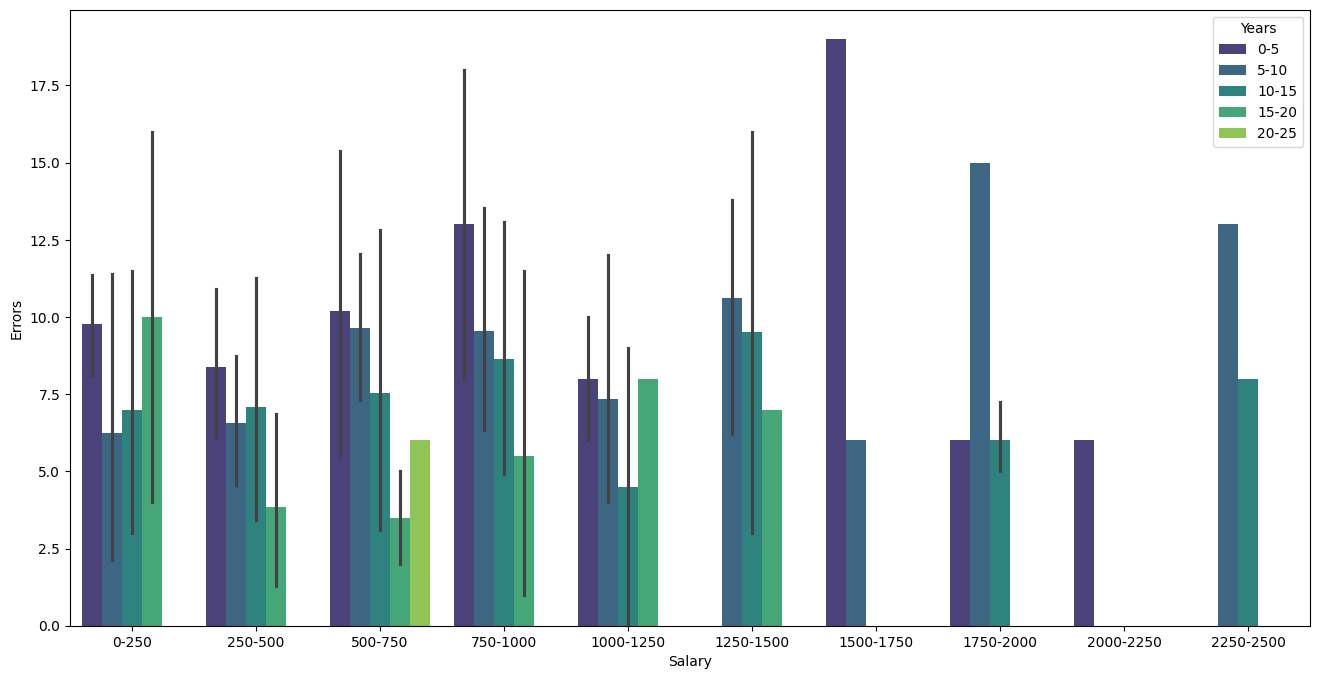

        0.050  0.100  0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900  0.950  0.990
Errors  0.000  1.000  3.000  4.000  5.000  6.000  8.000 10.000 13.000 17.000 20.000 25.790


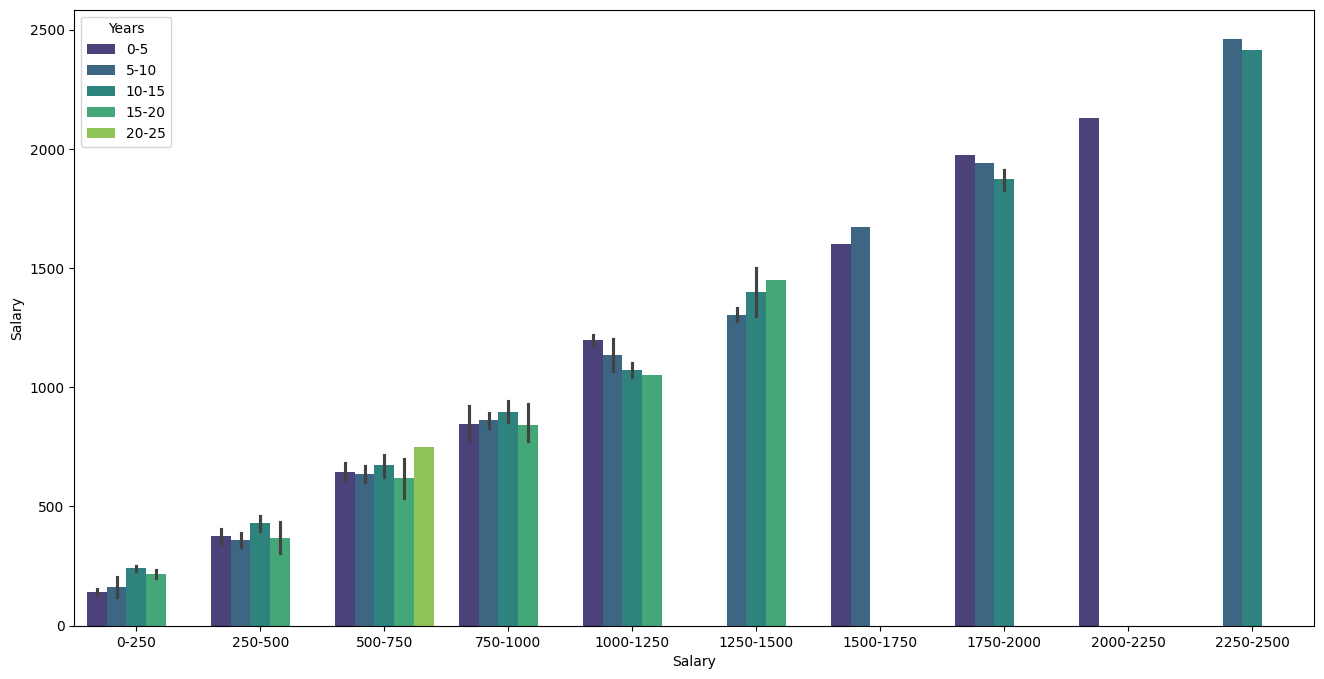

        0.050   0.100   0.200   0.300   0.400   0.500   0.600   0.700   0.800    0.900    0.950    0.990
Salary 86.600 100.000 155.000 221.000 300.000 425.000 538.000 700.000 809.000 1048.667 1346.000 2032.887


In [118]:
for col in num_cols:
    visual_num_cols(dataframe=data,col=col)

## Analysis of categorical variables

In [119]:
def visual_cat_cols(dataframe, col):
    
    print(pd.DataFrame({col: dataframe[col].value_counts(),
                        "Ratio": 100 * dataframe[col].value_counts() / len(dataframe)}))

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title(f"{col} vs Years")
    plt.xticks(rotation=75)
    sns.countplot(
        data=dataframe,
        x=col,
        hue=pd.cut(dataframe["Years"], bins=[0, 5, 10, 15, 20, 25], labels=["0-5", "5-10", "10-15", "15-20", "20-25"]),
        palette="crest"
    )
    bars = plt.gca().containers
    for bar in bars:
        for rect in bar.patches:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

    plt.subplot(1, 2, 2)
    plt.title(f"{col} vs Salary")
    sns.countplot(
        data=dataframe,
        x=col,
        hue=pd.cut(dataframe["Salary"], bins=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500],
                   labels=["0-250", "250-500", "500-750", "750-1000", "1000-1250", "1250-1500", "1500-1750", "1750-2000", "2000-2250", "2250-2500"]),
        palette="crest"
    )
    bars = plt.gca().containers
    for bar in bars:
        for rect in bar.patches:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')


    plt.tight_layout()
    plt.show()


        League  Ratio
League               
A          175 54.348
N          147 45.652


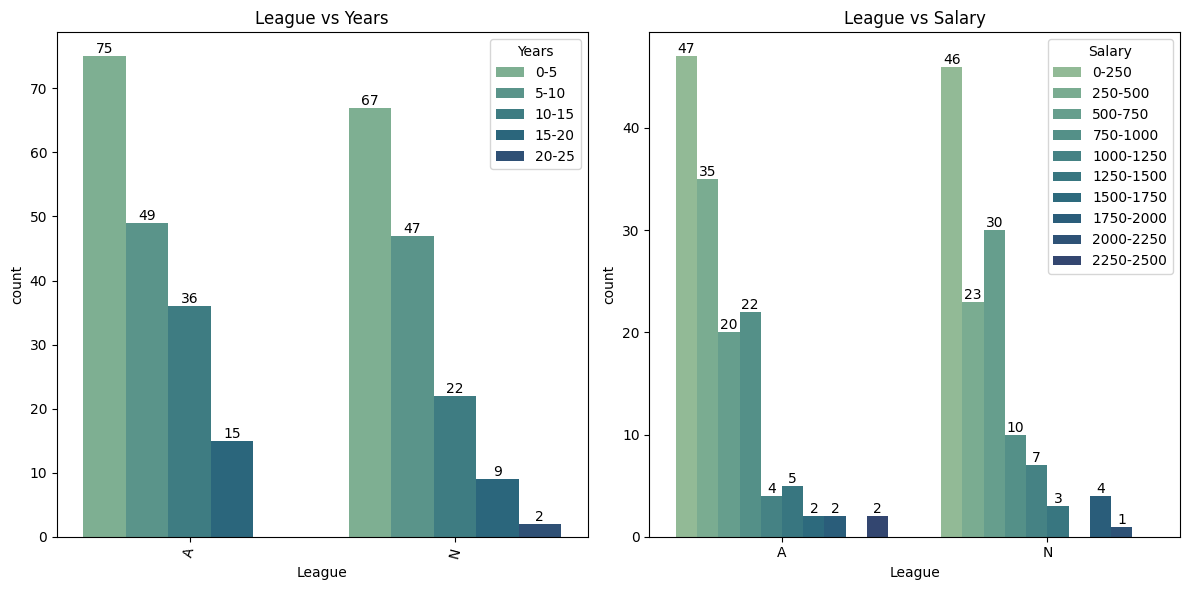

          Division  Ratio
Division                 
W              165 51.242
E              157 48.758


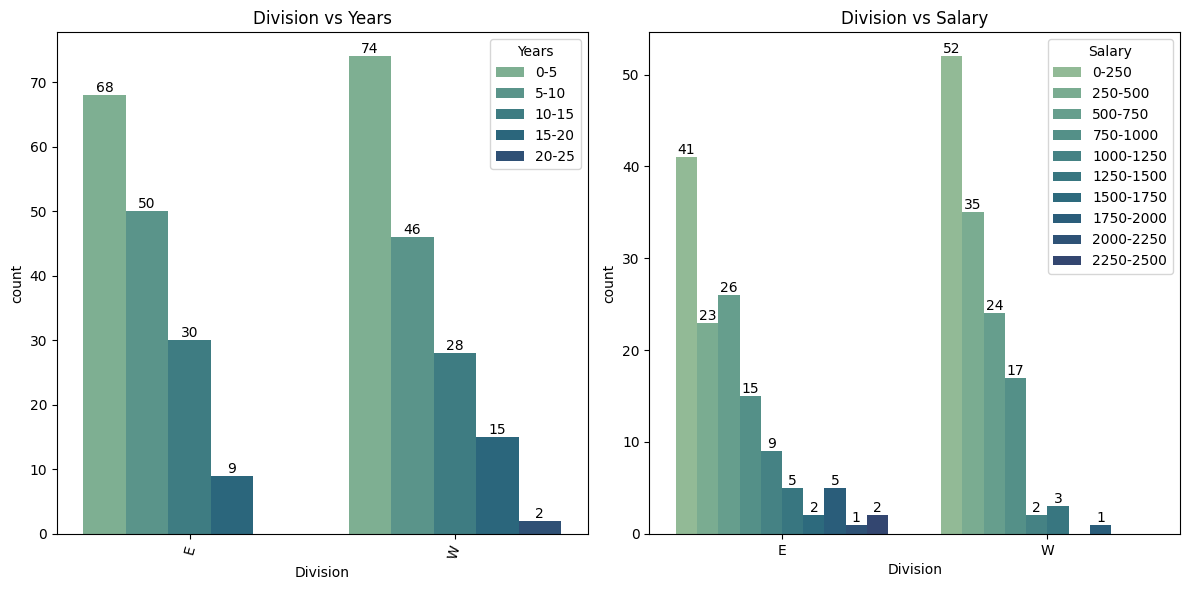

           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342


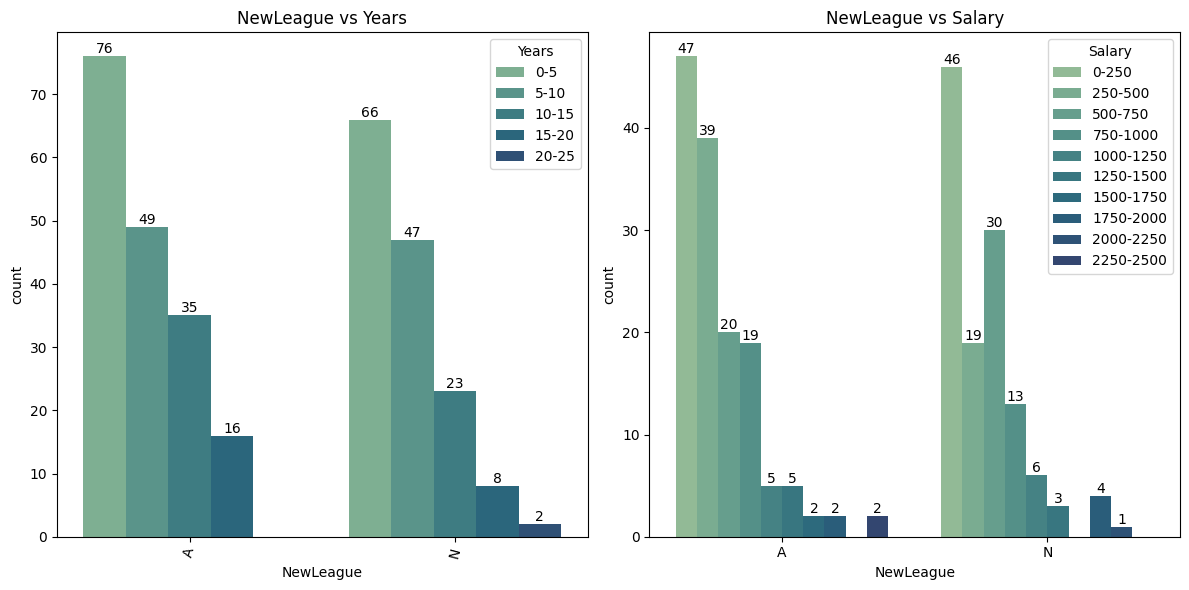

In [120]:
for col in cat_cols:
    visual_cat_cols(data,col)

In [121]:
print(data["League"].value_counts())
y=[indx for indx , val in enumerate(data[["NewLeague","League"]].values) if val[0]!=val[1]]

League
A    175
N    147
Name: count, dtype: int64


        League  Ratio
League               
N           10 52.632
A            9 47.368


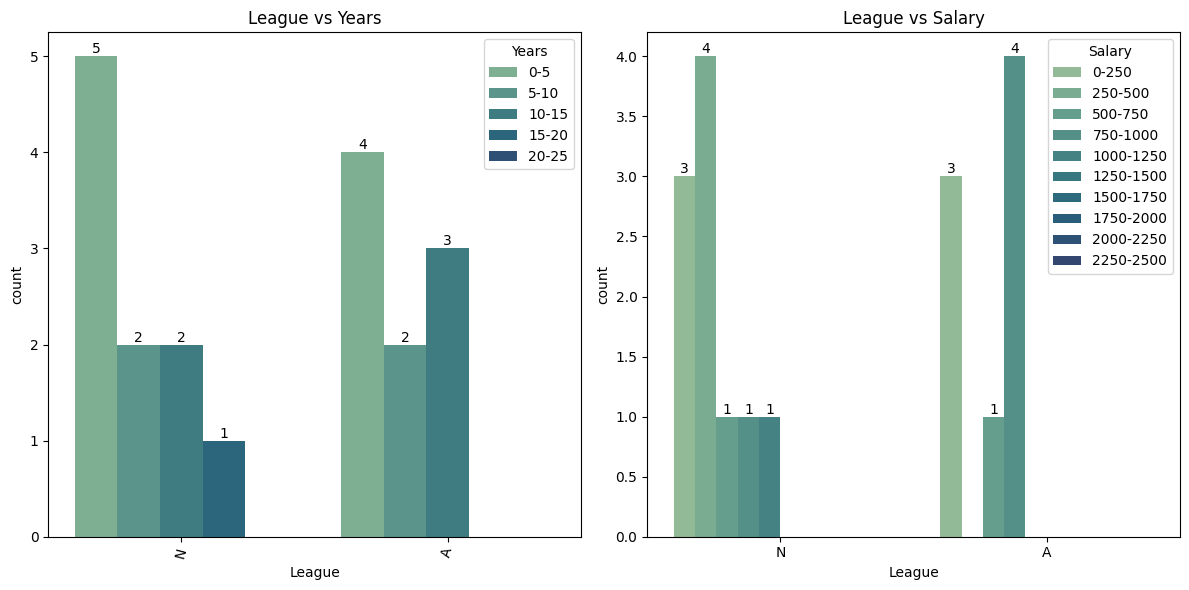

          Division  Ratio
Division                 
E               10 52.632
W                9 47.368


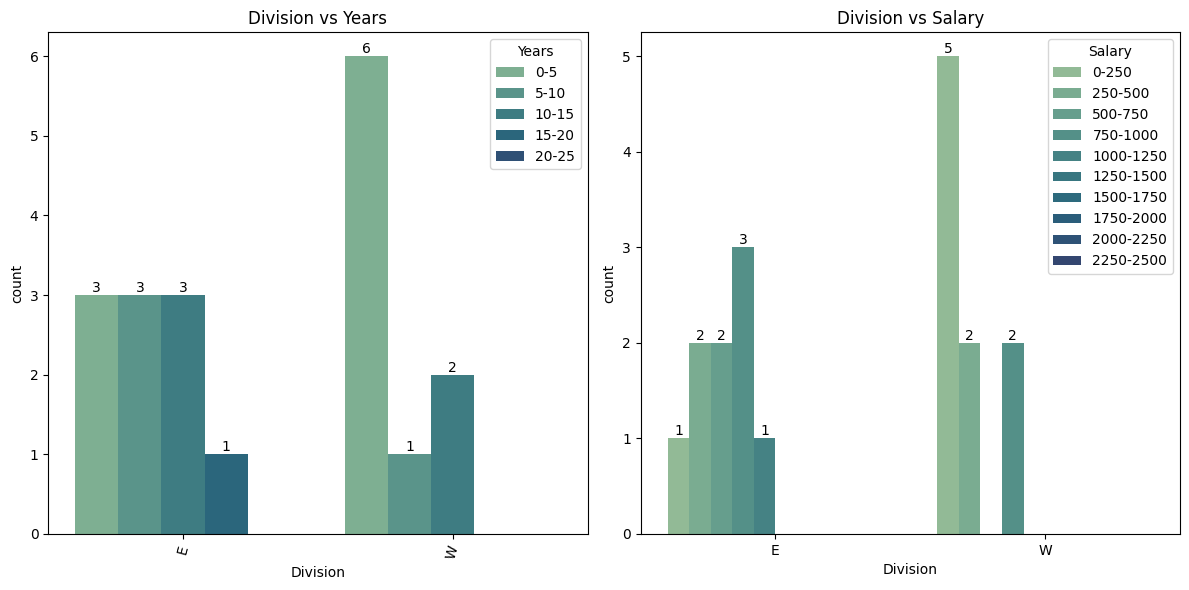

In [122]:
for col in cat_cols[:2]:
    visual_cat_cols(data.loc[y,:],col)

## Analysis of target variables

In [125]:
def target_summary_with_cat(dataframe, target, categorical_col):

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(data, "Salary", col)



        TARGET_MEAN
League             
A           542.000
N           529.118


          TARGET_MEAN
Division             
E             624.271
W             450.877


           TARGET_MEAN
NewLeague             
A              537.113
N              534.554




## Analysis of Correlation

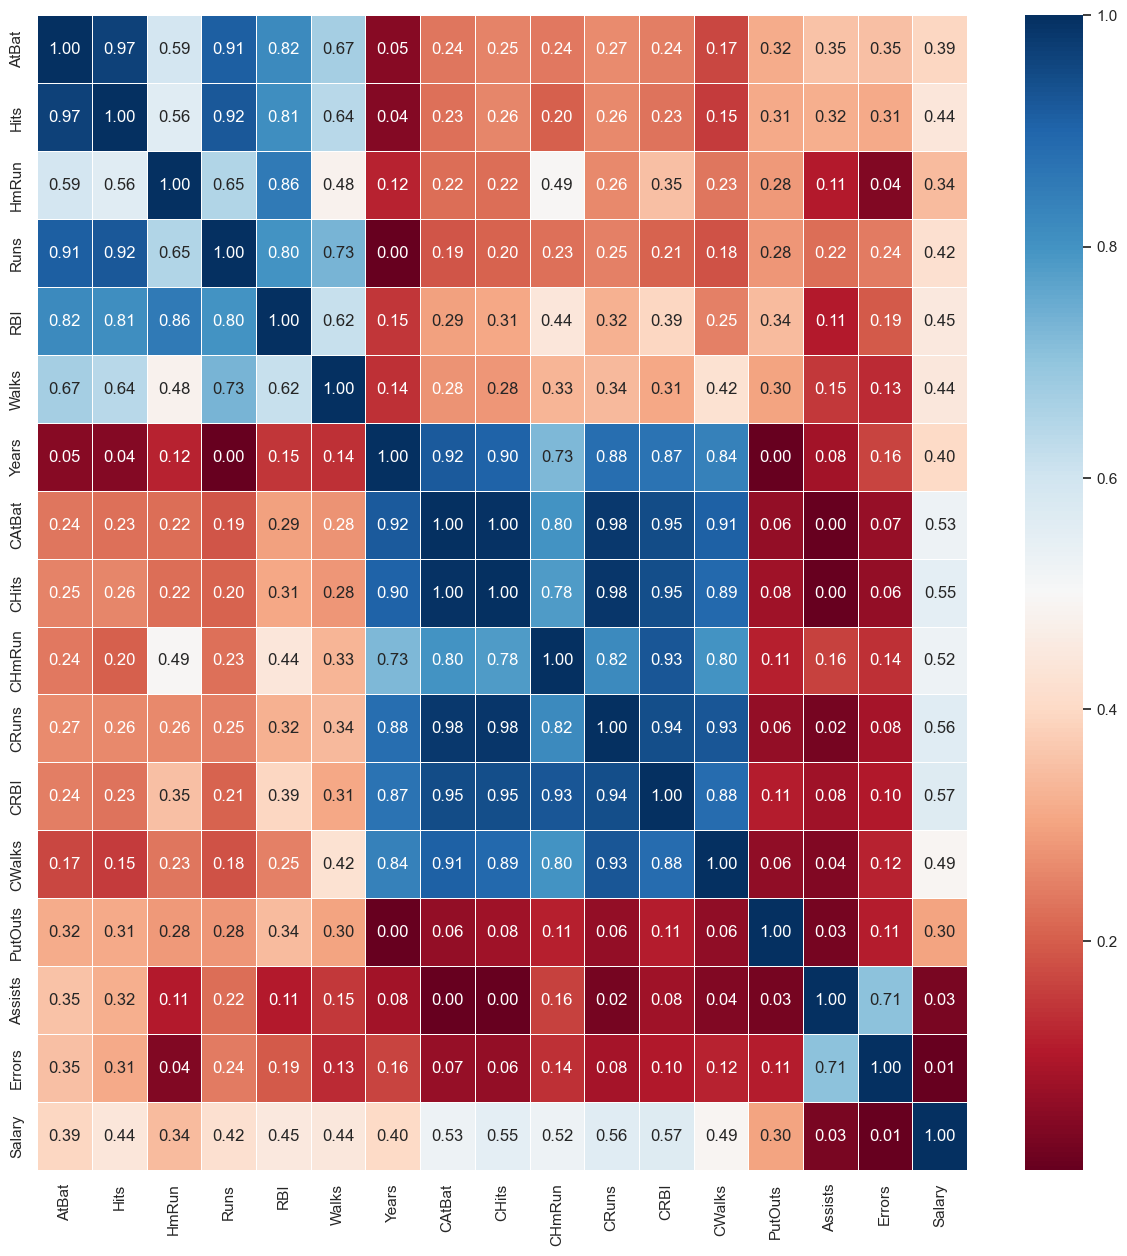

In [131]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(cor_matrix, cmap="RdBu", annot=True, fmt=".2f", linewidths=0.5)
        plt.show()
    return drop_list

drop_list=high_correlated_cols(data[num_cols], plot=True)
